In [1]:
import numpy as np
import pandas as pd
import os
from typing import List, Optional
import ast
import seaborn as sns
import matplotlib.pyplot as plt
from copy import deepcopy


from results_processing import get_groups, get_dataset, flatten_results, get_top_models, plot_per_model_metrics, clean_model_names, pivot_per_dataset, plot_per_datasets, create_formatted_df

# 1. Data post-processing

In [2]:
lcn_data = clean_model_names(pd.read_csv('LcnTotalResults.csv'))
mlp_data = clean_model_names(pd.read_csv('MlpTotalResults.csv'))
multi_data = clean_model_names(pd.read_csv('MultiModalResults.csv'))

data_groups = get_groups()

In [3]:
regression_cat_groups = data_groups['opml_reg_numcat_group']
regression_num_groups = data_groups['opml_reg_purnum_group']
classification_cat_groups = data_groups['opml_class_numcat_group']
classification_num_groups = data_groups['opml_class_purnum_group']


regression_groups = regression_cat_groups + regression_num_groups
classification_groups = classification_cat_groups + classification_num_groups

In [4]:
print(f'Total number of regression datasets: {len(regression_groups)}')
print(f'Total number of classificaitondatasets: {len(classification_groups)}')
print(f'Total number of datasets: {len(regression_groups) + len(classification_groups)}')

Total number of regression datasets: 36
Total number of classificaitondatasets: 23
Total number of datasets: 59


In [5]:
lcn_reg = get_dataset(lcn_data, regression_groups)
mlp_reg = get_dataset(mlp_data, regression_groups)
multi_reg = get_dataset(multi_data, regression_groups)

lcn_cls = get_dataset(lcn_data, classification_groups)
mlp_cls = get_dataset(mlp_data, classification_groups)
multi_cls = get_dataset(multi_data, classification_groups)

reg_datasets = pd.concat([lcn_reg, mlp_reg, multi_reg], ignore_index=True)
cls_datasets = pd.concat([lcn_cls, mlp_cls, multi_cls], ignore_index=True)

In [6]:
reg_results = flatten_results(reg_datasets, ['metrics'])
cls_results = flatten_results(cls_datasets, ['metrics'])
# reg_results.to_csv('regression_results.csv', index=False)
# cls_results.to_csv('classification_results.csv', index=False)
reg_results_separated = deepcopy(reg_results)
cls_results_separated = deepcopy(cls_results)


In [7]:
# Grouping the baseline models
group_multimodal = ['CatBoost', 'LGBM', 'SK_histGradBoost', 'XGBoost', 'SK_gradBoost']
rename = 'baseline'
reg_results['model'] = reg_results['model'].replace(group_multimodal, rename)
cls_results['model'] = cls_results['model'].replace(group_multimodal, rename)

Index(['dataset', 'model', 'hyperparameters', 'train_loss', 'epoch',
       'val_loss', 'test_loss', 'epoch_time', 'train_metrics.RMSE',
       'train_metrics.r2_score', 'train_metrics.se_quant', 'val_metrics.RMSE',
       'val_metrics.r2_score', 'val_metrics.se_quant', 'test_metrics.RMSE',
       'test_metrics.r2_score', 'test_metrics.se_quant',
       'validate_metrics.r2_score', 'validate_metrics.RMSE',
       'validate_metrics.se_quant'],
      dtype='object')
Index(['dataset', 'model', 'hyperparameters', 'train_loss', 'val_loss',
       'test_loss', 'epoch', 'epoch_time', 'train_metrics.accuracy_score',
       'train_metrics.roc_auc_score', 'train_metrics.confusion_matrix',
       'val_metrics.accuracy_score', 'val_metrics.roc_auc_score',
       'val_metrics.confusion_matrix', 'test_metrics.accuracy_score',
       'test_metrics.roc_auc_score', 'test_metrics.confusion_matrix',
       'validate_metrics.accuracy_score', 'validate_metrics.confusion_matrix',
       'validate_metrics.ro

# 2. Analyzing results

# 2.1 Accuracy:

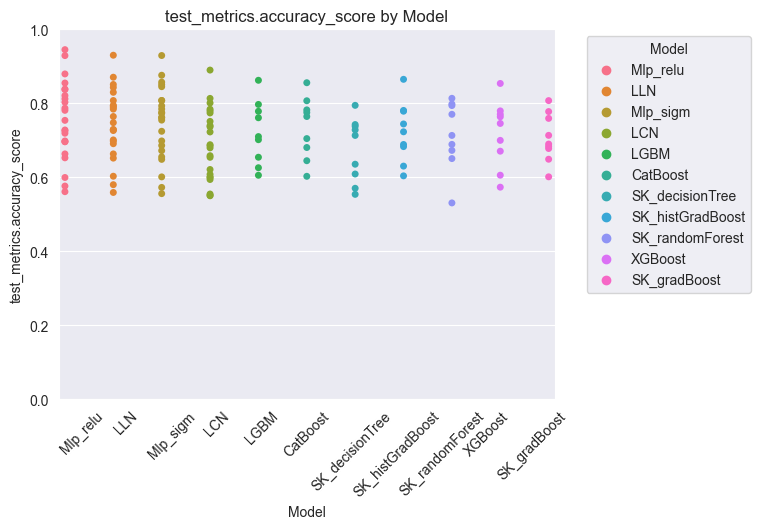

In [12]:
top_acc_sep = get_top_models(cls_results_separated, 'val_metrics.accuracy_score')
plot_per_model_metrics(top_acc_sep, 'test_metrics.accuracy_score')

# 2.2 Roc_auc_score

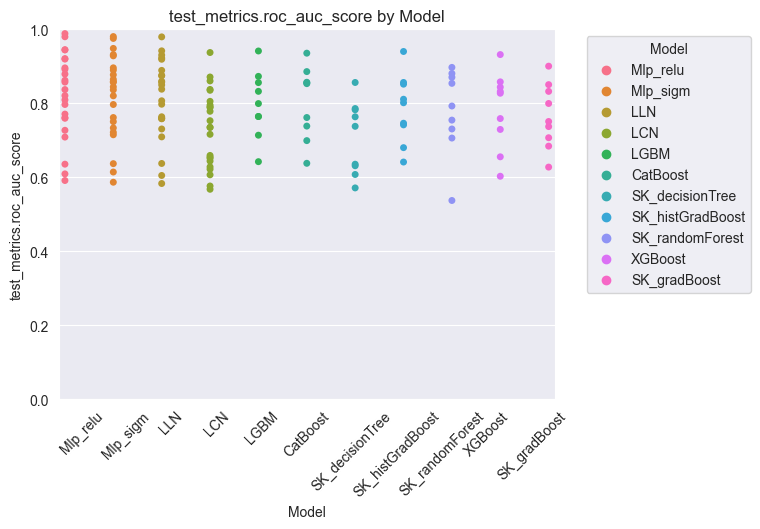

In [13]:
top_roc_sep = get_top_models(cls_results_separated, 'val_metrics.roc_auc_score')
plot_per_model_metrics(top_roc_sep, 'test_metrics.roc_auc_score')

# 2.3 RMSE

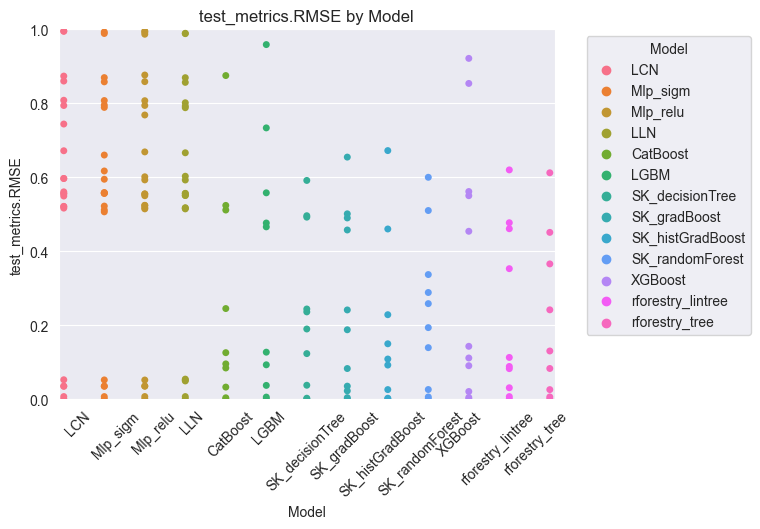

In [14]:
top_rmse_sep = get_top_models(reg_results_separated, 'val_metrics.RMSE', highest = False)
plot_per_model_metrics(top_rmse_sep, 'test_metrics.RMSE', scale = [0, 0.6])

# 2.4 R2 score

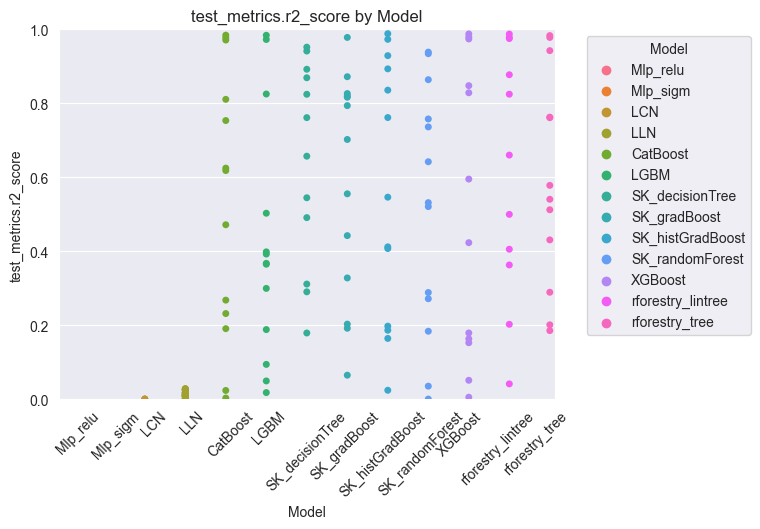

In [15]:
top_r2_sep = get_top_models(reg_results_separated, 'val_metrics.r2_score', highest = False)
plot_per_model_metrics(top_r2_sep, 'test_metrics.r2_score')

# 3 Per-dataset Accuracy

# 3.1 Top performing model

# 3.1.1 Top 1 performing model

In [37]:
enough_data = ['334-361282', '334-361285', '337-361055', '334-361283', '337-361066', '337-361061', '337-361273', '337-361277', '337-361275']
top_acc_score = get_top_models(cls_results, 'val_metrics.accuracy_score')
top_acc_per_dataset = pivot_per_dataset(top_acc_score, 'test_metrics.accuracy_score')
top_acc_per_dataset = top_acc_per_dataset[['model'] + enough_data]
top_acc_per_dataset.to_csv('saved_results/top_acc_per_dataset.csv')

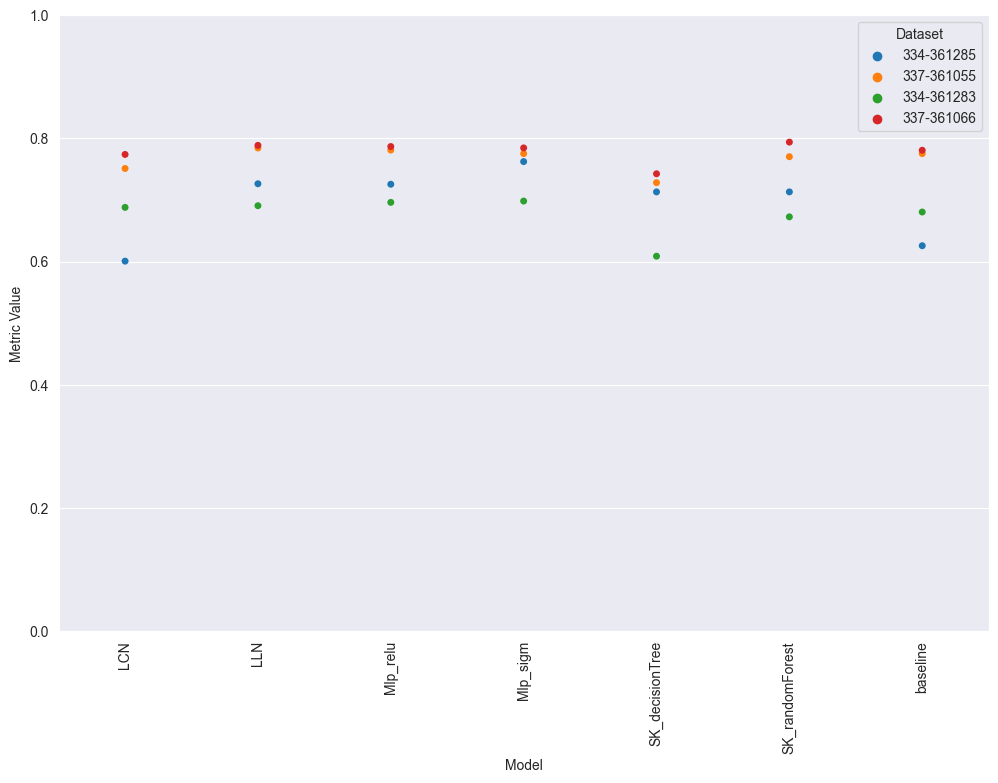

In [38]:
to_plot = enough_data[1:5]
plot_per_datasets(top_acc_per_dataset, to_plot, scale = True)

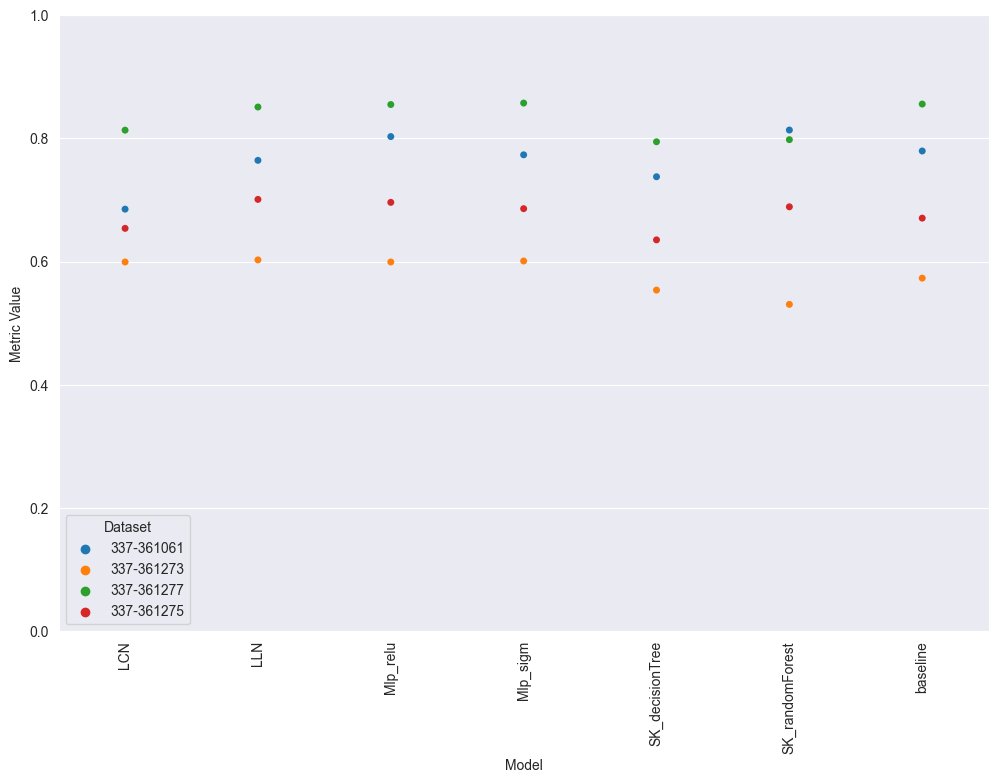

In [39]:
to_plot = enough_data[5:]
plot_per_datasets(top_acc_per_dataset, to_plot, scale = True)

In [40]:
per_dataset_top_acc = create_formatted_df(top_acc_per_dataset)
per_dataset_top_acc.to_csv('saved_results/per_dataset_acc_score.csv')

# 3.2

# 3.1.1 General Plots:

['334-361110', '334-361111', '334-361113', '334-361282']


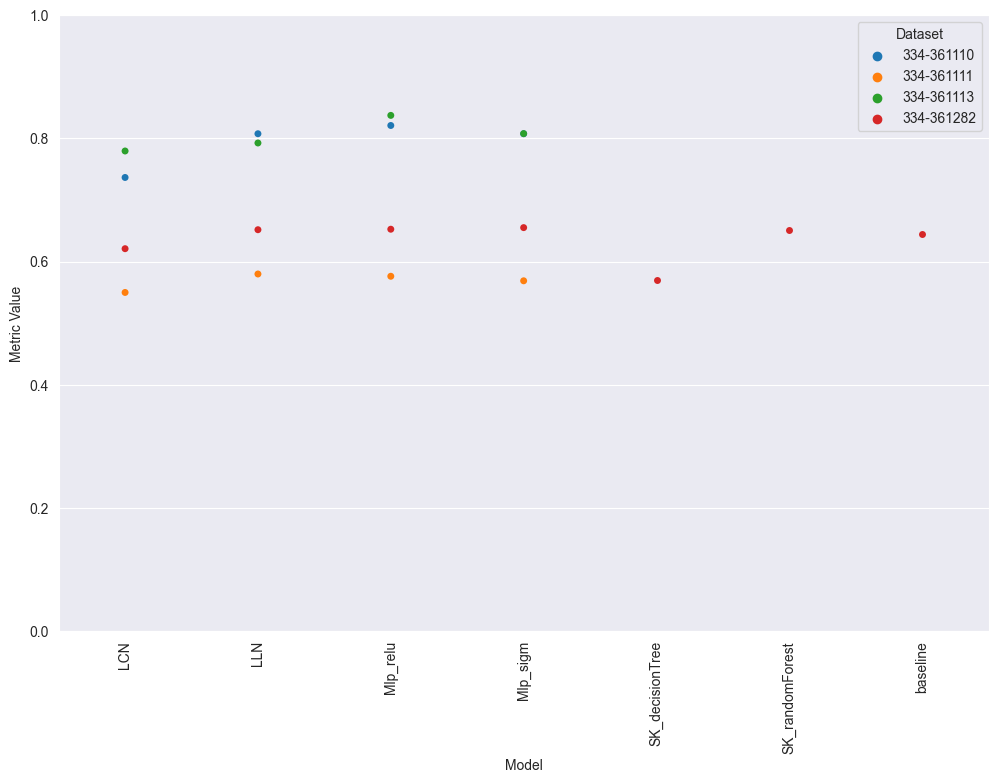

In [72]:
to_plot = top_acc_per_dataset.columns.tolist()[1:5]
print(to_plot)
plot_per_datasets(top_acc_per_dataset, to_plot, scale = True)

['334-361283', '334-361285', '334-361286', '337-361055', '337-361060']


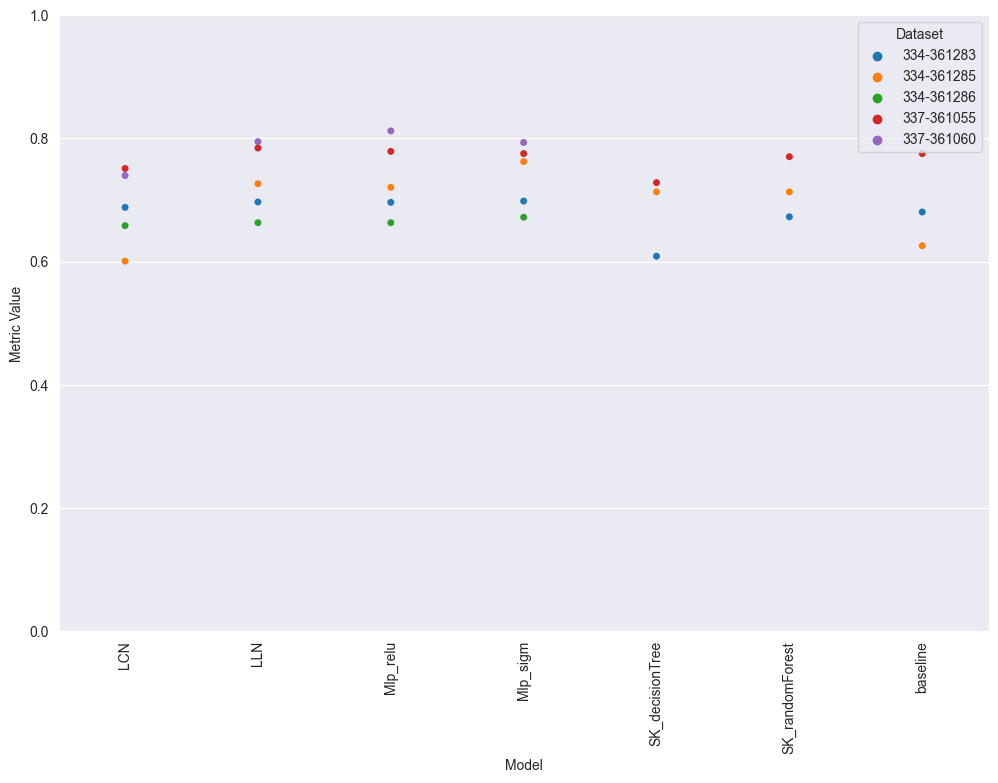

In [73]:
to_plot = top_acc_per_dataset.columns.tolist()[5:10]
print(to_plot)
plot_per_datasets(top_acc_per_dataset, to_plot, scale = True)

['337-361061', '337-361062', '337-361063', '337-361065', '337-361066']


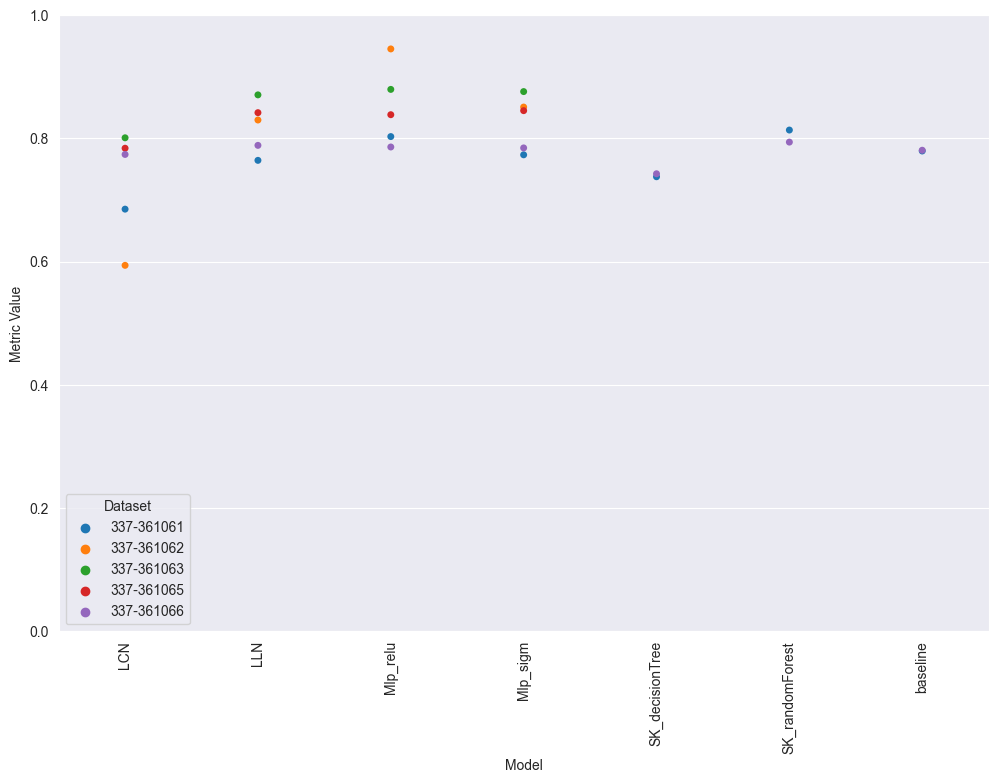

In [74]:
to_plot = top_acc_per_dataset.columns.tolist()[10:15]
print(to_plot)
plot_per_datasets(top_acc_per_dataset, to_plot, scale = True)

['337-361068', '337-361069', '337-361070', '337-361273', '337-361274']


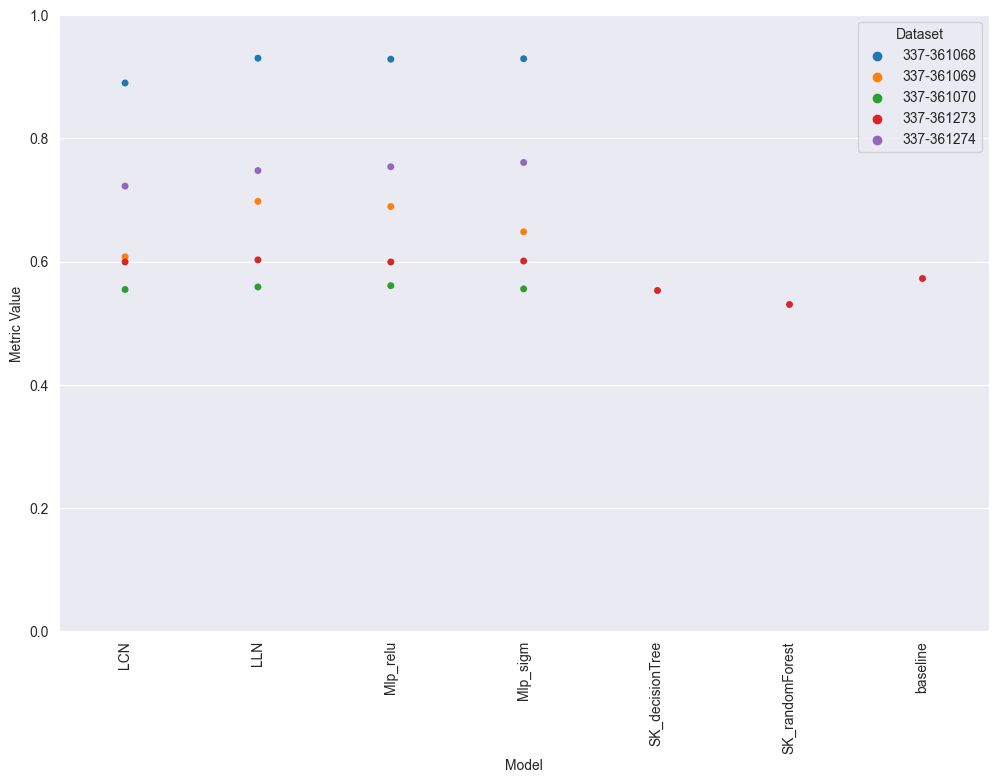

In [75]:
to_plot = top_acc_per_dataset.columns.tolist()[15:20]
print(to_plot)
plot_per_datasets(top_acc_per_dataset, to_plot, scale = True)

['337-361275', '337-361276', '337-361277', '337-361278']


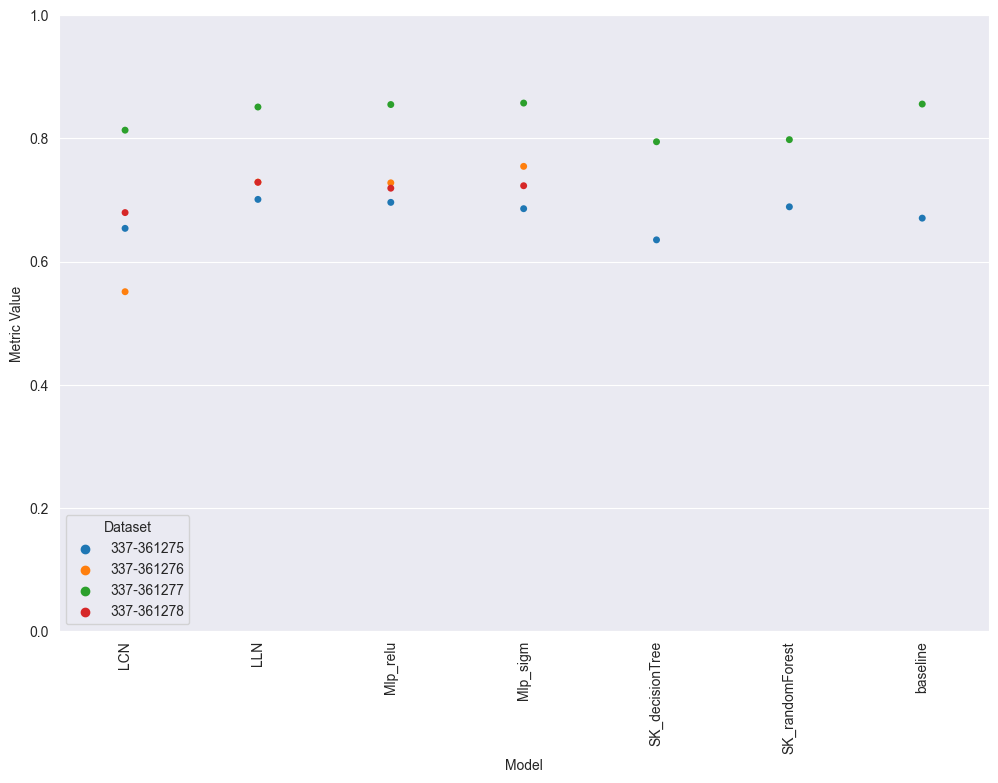

In [76]:
to_plot = top_acc_per_dataset.columns.tolist()[20:]
print(to_plot)
plot_per_datasets(top_acc_per_dataset, to_plot, scale = True)

In [63]:
cls_results.loc[cls_results['dataset'] == '337-361276']

,dataset,model,hyperparameters,train_loss,val_loss,test_loss,epoch,epoch_time,train_metrics.accuracy_score,train_metrics.roc_auc_score,train_metrics.confusion_matrix,val_metrics.accuracy_score,val_metrics.roc_auc_score,val_metrics.confusion_matrix,test_metrics.accuracy_score,test_metrics.roc_auc_score,test_metrics.confusion_matrix,validate_metrics.accuracy_score,validate_metrics.confusion_matrix,validate_metrics.roc_auc_score
888,337-361276,LLN,"{'depth': 8, 'seed': 42, 'drop_type': 'isDropC...",0.418140,60065.460938,48928.394531,30.0,43.660225,0.796620,0.831119,"[[696, 162], [187, 671]]",0.698135,0.718056,"[[329, 100], [159, 270]]",0.718605,0.739835,"[[324, 106], [136, 294]]",NaN,NaN,NaN
890,337-361276,LCN,"{'depth': 10, 'seed': 42, 'drop_type': 'isDrop...",0.010635,589.319824,577.931396,30.0,50.181859,0.566434,0.598395,"[[458, 400], [344, 514]]",0.540793,0.568515,"[[181, 248], [146, 283]]",0.573256,0.609375,"[[169, 261], [106, 324]]",NaN,NaN,NaN
892,337-361276,LCN,"{'depth': 11, 'seed': 42, 'drop_type': 'isDrop...",0.010670,611.361206,627.649048,30.0,54.602821,0.527389,0.548714,"[[109, 749], [62, 796]]",0.512821,0.518595,"[[34, 395], [23, 406]]",0.523256,0.525698,"[[54, 376], [34, 396]]",NaN,NaN,NaN
893,337-361276,LLN,"{'depth': 10, 'seed': 42, 'drop_type': 'isDrop...",0.286797,73569.695312,32611.007812,30.0,46.912236,0.801282,0.846386,"[[701, 157], [184, 674]]",0.712121,0.734054,"[[324, 105], [142, 287]]",0.725581,0.749386,"[[327, 103], [133, 297]]",NaN,NaN,NaN
895,337-361276,LLN,"{'depth': 9, 'seed': 42, 'drop_type': 'isDropC...",0.182284,20139.457031,26428.548828,30.0,45.502600,0.805944,0.853522,"[[691, 167], [166, 692]]",0.709790,0.735892,"[[316, 113], [136, 293]]",0.718605,0.753053,"[[321, 109], [133, 297]]",NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5073,337-361276,Mlp_relu,"{'depth': 4, 'seed': 42, 'regularize': 'bn', '...",0.000331,712.409058,713.273315,60.0,107.921132,0.998834,1.000000,"[[858, 0], [2, 856]]",0.710956,0.774317,"[[315, 114], [134, 295]]",0.704651,0.769935,"[[317, 113], [141, 289]]",NaN,NaN,NaN
5074,337-361276,Mlp_relu,"{'depth': 6, 'seed': 42, 'regularize': 'bn', '...",0.000035,662.962280,646.178406,60.0,106.444390,1.000000,1.000000,"[[858, 0], [0, 858]]",0.664336,0.745328,"[[290, 139], [149, 280]]",0.698837,0.769400,"[[295, 135], [124, 306]]",NaN,NaN,NaN
5075,337-361276,Mlp_sigm,"{'depth': 6, 'seed': 42, 'regularize': None, '...",0.010906,594.732422,596.113831,60.0,109.810258,0.500000,0.479332,"[[858, 0], [858, 0]]",0.500000,0.467532,"[[429, 0], [429, 0]]",0.500000,0.498560,"[[430, 0], [430, 0]]",NaN,NaN,NaN
5076,337-361276,Mlp_sigm,"{'depth': 3, 'seed': 42, 'regularize': 'bn', '...",0.000766,564.519165,581.007446,60.0,104.039507,0.613636,0.654267,"[[499, 359], [304, 554]]",0.601399,0.656658,"[[270, 159], [183, 246]]",0.572093,0.634749,"[[133, 297], [71, 359]]",NaN,NaN,NaN


# 3.2 Per-dataset model to model comparison

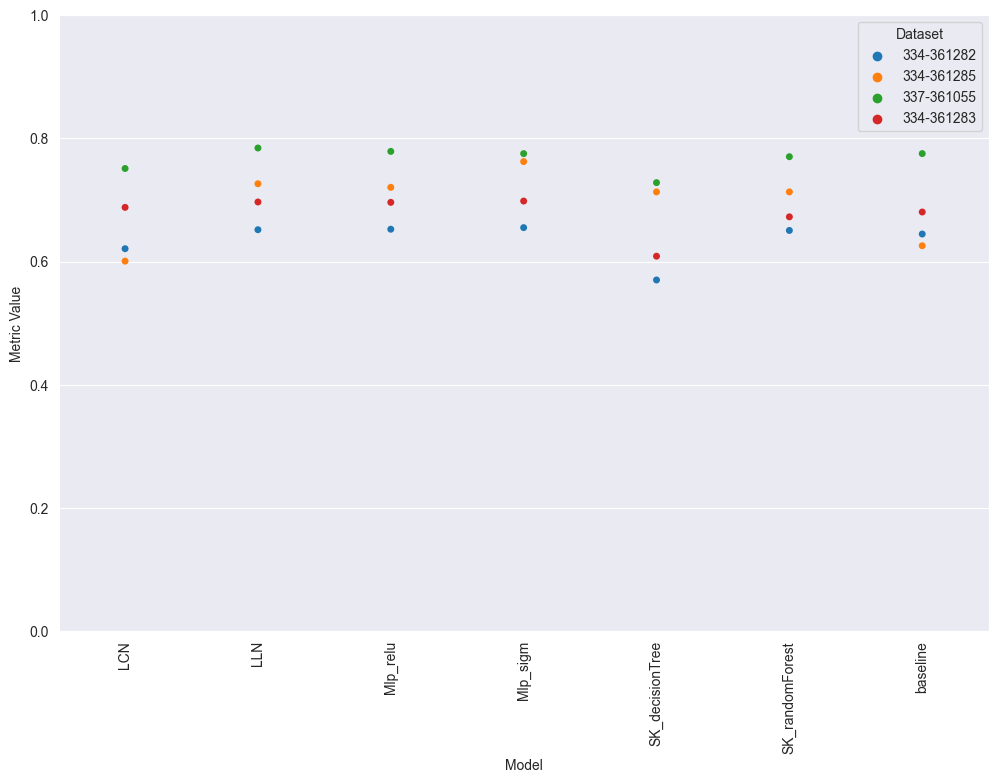

In [78]:
to_plot = ['334-361282', '334-361285', '337-361055', '334-361283', '337-361066', '337-361061', '337-361273', '337-361277', '337-361275']
plot_per_datasets(top_acc_per_dataset, to_plot[:4], scale = True)

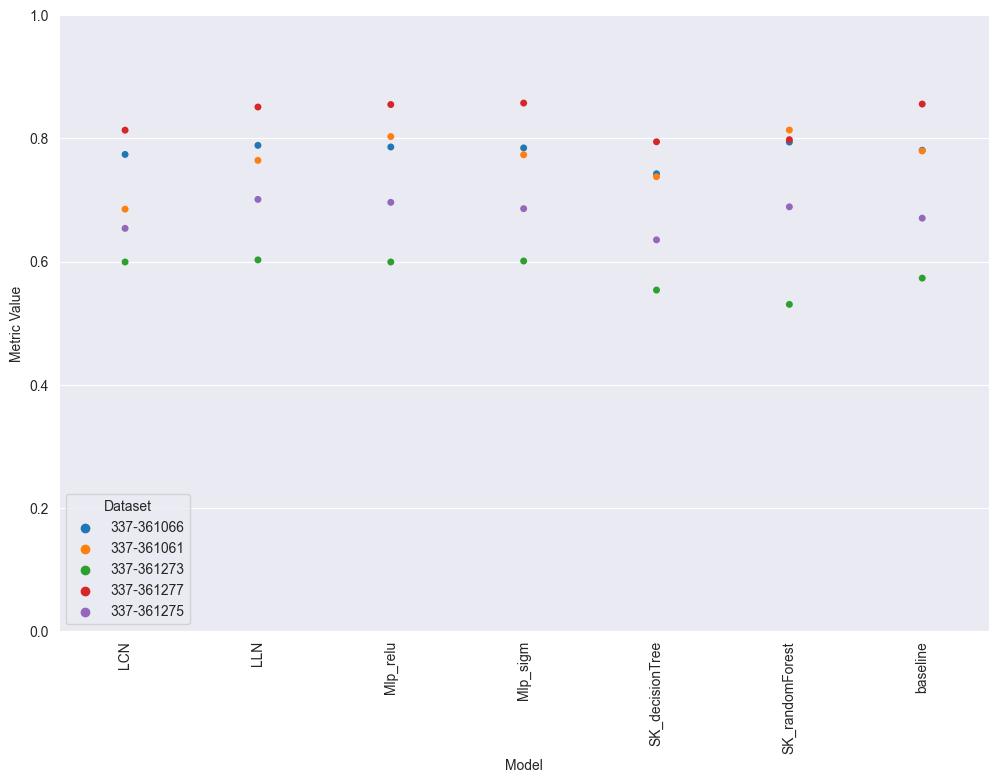

In [79]:
to_plot = ['334-361282', '334-361285', '337-361055', '334-361283', '337-361066', '337-361061', '337-361273', '337-361277', '337-361275']
plot_per_datasets(top_acc_per_dataset, to_plot[4:], scale = True)